# CvxPy

In [1]:
#!pip install cvxpy

In [2]:
import time
import numpy as np
import cvxpy as cvx

In [3]:
import matplotlib
import matplotlib.pyplot as plt

/home/elias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
matplotlib.use('Agg')
params = {'legend.fontsize': 20,
          'legend.handlelength': 4,
          "axes.labelsize": 45,
          "xtick.labelsize": 25,
          "ytick.labelsize": 25,
          "lines.linewidth": 4,
           "axes.titlesize":30}
matplotlib.rcParams.update(params)

## 1. CVXPY

CVXPY is a Python-embedded modeling language for convex optimization problems. It allows you to express your problem in a natural way that follows the math, rather than in the restrictive standard form required by solvers.

Below there are examples of CVXPY usage.

### 1.1. Unconstrained QP

$$\min_{x \in \mathbb{R}^n} \frac{1}{2}x^\top A x + b^\top x$$

In [5]:
n = 100
np.random.seed(41)
A = np.random.randn(n, n)
A = A.T @ A
b = np.random.randn(n)

In [6]:
# x is variable of diminsion n
x = cvx.Variable(n)
x

Variable((100,), var1)

In [7]:
# Objective function
obj = 1/2 * cvx.quad_form(x, A) + b @ x
obj = cvx.Minimize(obj)

In [8]:
# Problem
problem = cvx.Problem(obj)
problem.solve(verbose=True, solver="OSQP", eps_abs=1e-8, eps_rel=1e-8)

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Oct 28 07:44:19 PM: Your problem has 100 variables, 0 constraints, and 0 parameters.
(CVXPY) Oct 28 07:44:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 28 07:44:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 28 07:44:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 28 07:44:19 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 28 07:44:19 PM: Compiling problem (target solver=OSQP).
(CV

np.float64(-16.453510008799316)

In [9]:
x.value

array([-3.15658716e+00,  3.46431319e+00,  8.38580529e+00,  6.63168349e-01,
        2.17174870e+00, -4.71078344e+00, -1.01199829e+01, -8.07786113e-01,
       -7.19971073e+00, -3.93316697e-01, -6.23999881e+00, -1.75996496e-01,
        1.19733412e+01,  5.55755114e+00,  1.46779142e+01, -5.99166468e+00,
       -6.02009341e+00, -3.30181337e-01, -1.44852742e+01,  1.19158388e+00,
       -3.61174476e+00, -1.22402889e+00,  2.18802191e+00,  5.19542280e+00,
        1.30517346e+00, -7.23760192e+00, -1.12158986e+01, -8.13300361e+00,
       -1.81581037e+00, -1.21527969e+01, -1.34785639e+01,  4.63072052e+00,
       -9.42042009e+00, -5.66938571e-01,  3.44562696e+00, -3.16258945e+00,
       -9.39718528e+00, -1.05508417e+01,  7.79818825e+00, -1.70381263e+00,
        6.14765408e+00,  2.69907357e+00,  3.18833871e+00, -8.24090806e-01,
       -1.95130214e+00, -7.11332120e-01,  1.82889924e+00, -9.76581358e+00,
        5.79155091e+00,  1.31634518e+01,  1.55664729e-02, -1.40214859e+01,
        1.35364328e+01, -

In [10]:
np.linalg.norm(A @ x.value + b)

np.float64(8.273668625615326e-11)

### 1.2. QCQP

$$\min_{x \in \mathbb{R}^n} \frac{1}{2}x^\top A x + b^\top x$$

$$\text{s.t. } \frac{1}{2}x^\top A_i x + b_i^\top x+c_i \leq 0, i=\overline{1,m}$$

$$Gx=h$$

where $G\in\mathbb{R}^{d\times n}.$

In [11]:
np.random.seed(1)
n = 100
m = 1
d = 5
A = np.random.randn(n, n)
A = A.T @ A
b = np.random.randn(n)

G = np.random.randn(d, n)
h = np.random.randn(d)

A_list = [np.random.randn(n, n) for _ in range(m)]
A_list = [Ai.T @ Ai for Ai in A_list]
b_list = [np.random.randn(n) for _ in range(m)]
c_list = [np.random.randn() for _ in range(m)]

In [12]:
x = cvx.Variable(n)
obj = 1/2 * cvx.quad_form(x, A) + b @ x
obj = cvx.Minimize(obj)

In [13]:
constrains_lin = [G @ x == h]
constraints_quad = [1/2 * cvx.quad_form(x, Ai) + bi @ x + ci <= 0
                    for Ai, bi, ci in zip(A_list, b_list, c_list)]
constraints = constrains_lin + constraints_quad

In [14]:
# Problem
problem = cvx.Problem(obj, constraints)
result = problem.solve(verbose=True, solver="SCS")

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Oct 28 07:44:32 PM: Your problem has 100 variables, 6 constraints, and 0 parameters.
(CVXPY) Oct 28 07:44:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 28 07:44:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 28 07:44:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 28 07:44:33 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 28 07:44:33 PM: Compiling problem (target solver=SCS).
(CVX

In [15]:
x = x.value


In [16]:
x.shape

(100,)

In [17]:
1/2 * x.T @ A_list[0] @ x + b_list[0].T @ x + c_list[0]

np.float64(2.79253287160941e-09)

In [18]:
np.linalg.norm(G @ x - h)/5

np.float64(9.950900309866763e-15)

### 1.3. Log-Det minimization

Рассмотрим эллипсоид заданный при помощи матрицы $X\in\mathbb{S}^n_++$, как $E=\left\{a\in\mathbb{R}^n \Big| \|Xa + b\|\leq  1\right\}$. Эквивалентно, его можно определить, как прообраз шара под действием отображения, задаваемого матрицей $X$: $E=\left\{a\Big| Xa+b\in B_1(0)\right\}$. В таком случае мы можем вычислить его объем:

$$V_E = \iiint_{x \in E} dx = \iiint_{x| Xx\in B_1(0)} dx= \iiint_{y \in B_1(0)} \det\frac{\partial X^{-1} y}{\partial y} dy=\det (X^{-1}) V_{B_1(0)}$$

Теперь рассмотрим задачу построения минимального по объему эллипсоида, такого что точки $\{a_i\}_{i=1}^m$ лежат в нем, т.е. $\|Xa_i\|\leq 1$. Минимизация объема $V_E$ эквивалентна минимизации $\log V_E = \log \det (X^{-1}) + \log V_{B_1(0)}=-\log\det X + c$. Тогда опуская аддитивную константу, получаем задачу минимизации:

$$\min_{X\in\mathbb{S}^n_++} -\log\det X$$

$$\text{s.t. } \|X a_i+b\|\leq 1, i=\overline{1,m}$$

In [19]:
np.random.seed(1)
n = 2
m = 100
A = np.random.randn(m, n)

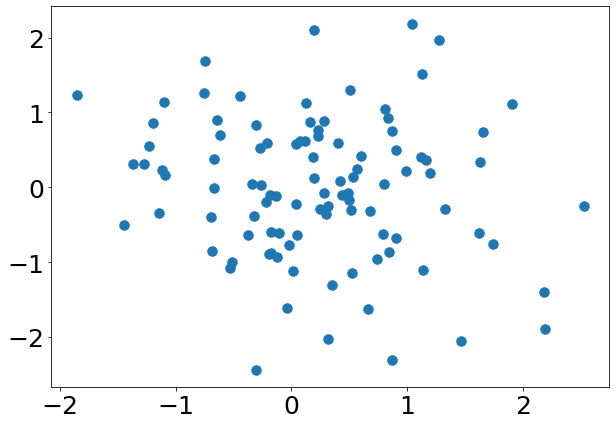

In [20]:
%matplotlib inline
plt.figure(figsize=(10, 7))
plt.scatter(A[:, 0], A[:, 1], s=90)

In [21]:
X = cvx.Variable((n, n))
b = cvx.Variable(n)

In [24]:
obj = cvx.Minimize(-cvx.log_det(X))
constraints = [cvx.norm(X @ ai + b) <= 1 for ai in A]
problem = cvx.Problem(obj, constraints)
_ = problem.solve(verbose=True)

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Oct 28 07:58:09 PM: Your problem has 6 variables, 100 constraints, and 0 parameters.
(CVXPY) Oct 28 07:58:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 28 07:58:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 28 07:58:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 28 07:58:09 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 28 07:58:09 PM: Compiling problem (target solver=SCS).
(CVX

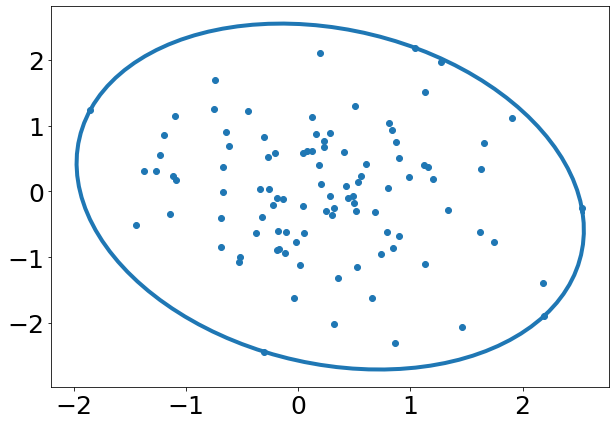

In [25]:
L = np.linalg.inv(X.value)
plt.figure(figsize=(10, 7))
plt.scatter(A[:, 0], A[:, 1])
phi = np.linspace(0, 2 * np.pi, num=100)
xy = np.vstack((np.cos(phi), np.sin(phi))) - b.value.reshape(-1, 1)
ellips = L.dot(xy)
plt.plot(ellips[0, :], ellips[1, :])

### 1.4. Problem 1

$$\max_{x \in \mathbb{R}^n} c^\top x$$

$$\text{s.t. } \sum\limits_{i=1}^n x_i A_i \succeq 0, \|x\|_1 \leq 1,$$

где матрицы $A_i \in S^n.$

In [26]:
np.random.seed(1)
n = 30
m = 10
A_list = [np.random.randn(n, n) for i in range(n)]
A_list = [A @ A.T for A in A_list]
c = np.random.randn(n)

In [27]:
x = cvx.Variable(n)
obj = cvx.Maximize(c @ x)
xA = cvx.sum([x[ind] * A_list[ind] for ind in range(n)])
constraints = [cvx.norm(x, 1) <= 1] + [xA>>0]
problem = cvx.Problem(obj, constraints)
problem.solve(verbose=True, solver="SCS")

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Oct 28 08:02:18 PM: Your problem has 30 variables, 901 constraints, and 0 parameters.
(CVXPY) Oct 28 08:02:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 28 08:02:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 28 08:02:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Oct 28 08:02:19 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 28 08:02:19 PM: Compiling problem (target solver=SCS).
(CV

 20000| 1.00e-03  9.75e-06  1.75e-06 -2.35e+00  1.13e-02  8.16e+00 
 20250| 9.88e-04  9.63e-06  1.73e-06 -2.35e+00  1.13e-02  8.26e+00 
 20500| 9.74e-04  9.51e-06  1.70e-06 -2.35e+00  1.13e-02  8.36e+00 
 20750| 9.60e-04  9.39e-06  1.68e-06 -2.35e+00  1.13e-02  8.47e+00 
 21000| 7.19e+00  2.76e-01  2.96e-06 -2.35e+00  1.13e-02  8.57e+00 
 21250| 9.34e-04  9.15e-06  1.63e-06 -2.35e+00  1.13e-02  8.66e+00 
 21500| 9.21e-04  9.03e-06  1.61e-06 -2.35e+00  1.13e-02  8.78e+00 
 21750| 9.11e-04  8.92e-06  1.58e-06 -2.35e+00  1.13e-02  8.87e+00 
 22000| 9.04e-04  8.80e-06  1.56e-06 -2.35e+00  1.13e-02  8.98e+00 
 22250| 8.96e-04  8.69e-06  1.54e-06 -2.35e+00  1.13e-02  9.08e+00 
 22500| 8.88e-04  8.58e-06  1.52e-06 -2.35e+00  1.13e-02  9.17e+00 
 22750| 8.80e-04  8.47e-06  1.49e-06 -2.35e+00  1.13e-02  9.26e+00 
 23000| 8.73e-04  8.36e-06  1.47e-06 -2.35e+00  1.13e-02  9.35e+00 
 23250| 8.65e-04  8.26e-06  1.45e-06 -2.35e+00  1.13e-02  9.44e+00 
 23500| 8.58e-04  8.15e-06  1.43e-06 -2.35e+00  

np.float64(2.3467224930094495)

In [28]:
x_sol = x.value
A_ = sum([x_sol[ind] * A_list[ind] for ind in range(n)])
np.linalg.eigh(A_)[0].min(), np.linalg.norm(x_sol, 1)

(np.float64(0.0006081892550458109), np.float64(1.0060610320941124))

### 1.5. Sparse solution of linear inequalities

The system of linear inequality $Ax\leq b$ is given. Our problem is to find sparse solution of this system.

The problem of finding the most sparse solution:

$$\min_{x\in\mathbb{R}^n} \|x\|_0,$$

$$\text{s.t. }Ax\leq b,$$
where $A\in\mathbb{R}^{m \times n}$, $\|x\|_0=\left|\{i=\overline{1,n}| x_i\neq 0\}\right|.$

Its convex relaxation:
$$\min_{x\in\mathbb{R}^n} \|x\|_{\color{red}1},$$

$$\text{s.t. }Ax\leq b,$$

Consider the problem:
$$\min_{x\in\mathbb{R}^n} \sum\limits_{i=1}^n \log(\delta+|x_i|),$$

$$\text{s.t. }Ax\leq b,$$

$$\sum\limits_{i=1}^n \log(\delta+|x_i|) \approx n\log \delta + \sum\limits_{i=1}^n \frac{1}{\delta+|x_i|}|x_i|$$

Solve the following problems sequentially
$$\min_{x^k \in\mathbb{R}^n} \sum\limits_{i=1}^n W_i^k |x_i^k|,$$

$$\text{s.t. }Ax\leq b,$$
where weights $W_i^k = \frac{1}{\delta+|x_i^\color{red}{k-1}|}$ depend on $x^k$ from previous iteration.

In [29]:
delta = 1e-8

In [30]:
np.random.seed(1)
m = 100
n = 100
A = np.random.randn(m, n)
b = np.random.randn(m)

In [31]:
x = cvx.Variable(n)
obj = cvx.Minimize(cvx.sum(cvx.abs(x)))
constraints = [A@x<=b]
problem = cvx.Problem(obj, constraints)
problem.solve(verbose=False)

np.float64(5.5110847615960035)

In [32]:
x = x.value

In [33]:
np.sum(np.abs(x)>delta)

np.int64(52)

The log-based heuristic


In [41]:
NUM_RUNS = 15
nnzs_log = np.array(())

# Store W as a positive parameter for simple modification of the problem.
W = cvx.Parameter(n, nonneg=True)
x_log = cvx.Variable(shape=n)

# Initial weights.
W.value = np.ones(n)

# Setup the problem.
obj = cvx.Minimize( W @ cvx.abs(x_log)) # sum of elementwise product
constraints = [A@x_log <= b]
prob = cvx.Problem(obj, constraints)

In [42]:
# Do the iterations of the problem, solving and updating W.
for k in range(1, NUM_RUNS+1):
    # Solve problem.
    # The ECOS solver has known numerical issues with this problem
    # so force a different solver.
    prob.solve()

    # Check for error.
    if prob.status != cvx.OPTIMAL:
        raise Exception("Solver did not converge!")

    # Display new number of nonzeros in the solution vector.
    nnz = (np.absolute(x_log.value) > delta).sum()
    nnzs_log = np.append(nnzs_log, nnz);
    print('Iteration {}: Found a feasible x in R^{}'
          ' with {} nonzeros...'.format(k, n, nnz))

    # Adjust the weights elementwise and re-iterate
    W.value = np.ones(n)/(delta*np.ones(n) + np.absolute(x_log.value))

Iteration 1: Found a feasible x in R^100 with 52 nonzeros...
Iteration 2: Found a feasible x in R^100 with 40 nonzeros...
Iteration 3: Found a feasible x in R^100 with 29 nonzeros...
Iteration 4: Found a feasible x in R^100 with 28 nonzeros...
Iteration 5: Found a feasible x in R^100 with 28 nonzeros...
Iteration 6: Found a feasible x in R^100 with 25 nonzeros...
Iteration 7: Found a feasible x in R^100 with 25 nonzeros...
Iteration 8: Found a feasible x in R^100 with 25 nonzeros...
Iteration 9: Found a feasible x in R^100 with 24 nonzeros...
Iteration 10: Found a feasible x in R^100 with 24 nonzeros...
Iteration 11: Found a feasible x in R^100 with 24 nonzeros...
Iteration 12: Found a feasible x in R^100 with 24 nonzeros...
Iteration 13: Found a feasible x in R^100 with 24 nonzeros...
Iteration 14: Found a feasible x in R^100 with 24 nonzeros...
Iteration 15: Found a feasible x in R^100 with 24 nonzeros...
